In [0]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

import pipeline
#import importlib
#importlib.reload(pipeline)

In [0]:
df = pd.read_csv('df.csv', index_col = 0)
labels = pd.read_csv('labels.csv', index_col = 0)

In [0]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        #torch.manual_seed(0)
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, output_dim)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.softmax(self.fc6(x))
        return x

In [61]:
models = {n_labels : pipeline.PurchaseModel(n_labels) for n_labels in [2, 10, 20, 50, 100]}
_ = [model.load_data() for model in models.values()]
_ = [model.build_net() for model in models.values()]
_ = [model.train(nn.NLLLoss(), epochs = 250) for model in models.values()]

Loading 2-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 10-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 20-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 50-Purchase from GitHub: 0.2 train, 0.8 test.
Loading 100-Purchase from GitHub: 0.2 train, 0.8 test.
[0] loss: 7.933
[5] loss: 5.346
[10] loss: 7.001
[15] loss: 0.049
[20] loss: 0.000
[25] loss: 0.001
[30] loss: 0.000
[35] loss: 0.000
Terminated Early. 10 successive epochs all have 0 loss
Finished Training
[0] loss: 30.107
[5] loss: 36.148
[10] loss: 1.820
[15] loss: 0.065
[20] loss: 0.026
[25] loss: 0.016
[30] loss: 0.011
[35] loss: 0.008
[40] loss: 0.006
[45] loss: 0.005
[50] loss: 0.004
[55] loss: 0.003
[60] loss: 0.002
[65] loss: 0.002
[70] loss: 0.002
[75] loss: 0.001
[80] loss: 0.001
[85] loss: 0.001
[90] loss: 0.001
[95] loss: 0.001
[100] loss: 0.001
[105] loss: 0.001
[110] loss: 0.001
[115] loss: 0.001
[120] loss: 0.000
[125] loss: 0.001
[130] loss: 0.000
[135] loss: 0.001
[140] loss: 0.000
[145] loss: 0.001
[15

In [0]:
aucs = {n_labels : model.auc() for n_labels, model in models.items()}

In [0]:
# compute hamming distance from point to set
def ham_set(p, t):
    p = p.transpose()
    n1 = np.matmul(t, p)
    n0 = np.matmul(1 - t, 1 - p)
    return len(p) - np.amax(n1 + n0, axis=0)

In [0]:
by_distance = {n_labels : model.auc_by_distance(ham_set, 3) for n_labels, model in models.items()}

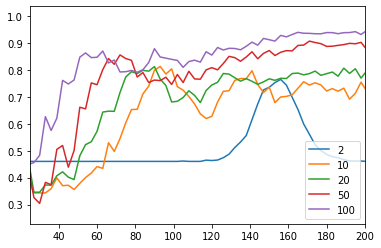

In [64]:
import matplotlib.pyplot as plt
for n_labels, pair in by_distance.items():
    keys, aucs = pair
    plt.plot(keys, aucs, label = n_labels)
plt.legend(loc = 'lower right')
plt.xlim(25, 200)
plt.show()